# Airbnb User Booking Analysis 

# DAV - Final Project

# Submission By

Sagar Vasaikar, Saachi Shah, Tarang Haria

# INTRODUCTION

AirBnb is a vacation rental marketplace with more than 2,000,000 vacation rentals in 190 countries listed on its website.It operates through 50 websites in 23 languages through which it offers rentals of cabins, condos, castles, villas, barns, and farmhouses. Founded in February 2005 and headquartered in Austin, Texas, the company became a publicly traded company in 2011. Expedia acquired AirBnb on December 15, 2015. Members can use the service to arrange or offer lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; as a broker, it receives commissions from every booking. HomeAway is an online marketplace and hospitality service, enabling people to lease or rent short-term lodging including vacation rentals , apartment rentals, homestays , hostels beds, or hotel roo ms. New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries

# PROBLEM STATEMENT
Problem Statement- Airbnb is a vacation rental marketplace with more than 2,000,000 vacation rentals in 190 countries listed on its website. It operates through 50 websites in 23 languages through which it offers rentals of cabins, condos, castles, villas, barns, and farmhouses. Members can use the service to arrange or offer lodging, primarily homestays, or tourism experiences. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

# Insights
1)Examining users Age, Gender, Previous Destinations and then predicting users next preferred
destination and also the best time to visit destinations.

2)We will also try to predict number of times they visited the website and the networking trail
they use to make the decisions.

3)Target Marketing – Will help Airbnb target right customers based on age, sex, location,
language etc

# File descriptions


• train_users.csv - the training set of users • test_users.csv - the test set of users o id: user id o date_account_created: the date of account creation o timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up o date_first_booking: date of first booking o gender o age o signup_method o signup_flow: the page a user came to signup up from o language: international language preference o affiliate_channel: what kind of paid marketing o affiliate_provider: where the marketing is e.g. google, craigslist, other o first_affiliate_tracked: whats the first marketing the user interacted with before the signing up o signup_app o first_device_type o first_browser o country_destination: this is the target variable you are to predict • sessions.csv - web sessions log for users o user_id: to be joined with the column 'id' in users table o action o action_type o action_detail o device_type o secs_elapsed • countries.csv - summary statistics of destination countries in this dataset and their locations • age_gender_bkts.csv - summary statistics of users' age group, gender, country of destination • sample_submission.csv - correct format for submitting your predictions

# Assumption of the data made:
The training and test sets are split by dates. In the test set, you will predict al
l the new users with first activities after 7/1/2014. In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

# Packages Used:
Numpy: Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Pandas: Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

matplotlib.pyplot: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. Pyplot is a matplotlib module which provides a MATLAB-like interface. Matplotlib is designed to be as usable as MATLAB, with the ability to use Python, and the advantage of being free and open-source.

sklearn.model_selection: Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [83]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
%matplotlib inline
from sklearn.model_selection import train_test_split

In [84]:
# Load the data into DataFrames
train_users = pd.read_csv('C:/Users/shahs/Desktop/Rutgers/Sem 2/STATS & ML/train_users_2.csv')
test_users = pd.read_csv('C:/Users/shahs/Desktop/Rutgers/Sem 2/STATS & ML/test_users.csv')
countries= pd.read_csv('C:/Users/shahs/Desktop/Rutgers/Sem 2/STATS & ML/countries.csv')
sessions=pd.read_csv('C:/Users/shahs/Desktop/Rutgers/Sem 2/STATS & ML/sessions.csv')   

In [85]:
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [86]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)
users.head()

C:\Users\shahs\aa\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,6/28/2010,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2.009030e+13
1,seo,google,38.0,NDF,5/25/2011,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2.009050e+13
2,direct,direct,56.0,US,9/28/2010,8/2/2010,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2.009060e+13
3,direct,direct,42.0,other,12/5/2011,9/8/2012,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2.009100e+13
4,direct,direct,41.0,US,9/14/2010,2/18/2010,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2.009120e+13


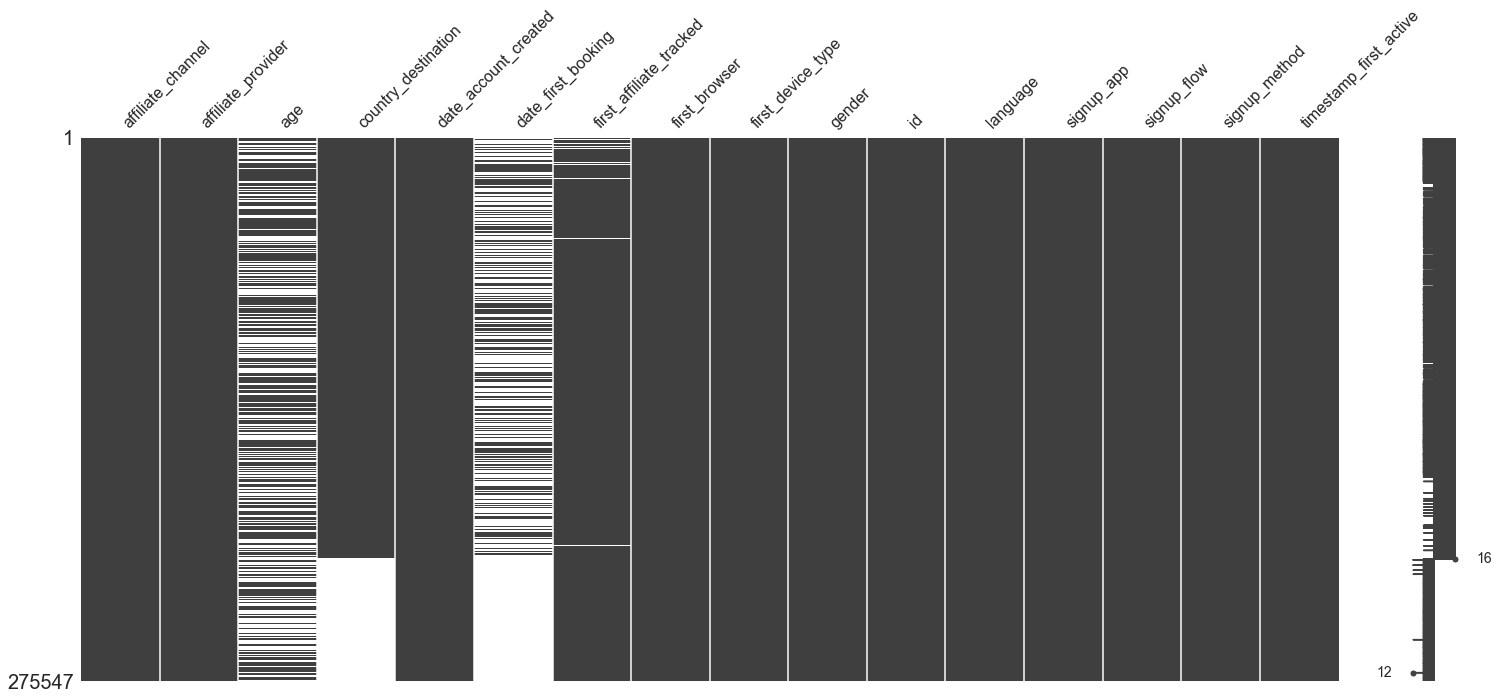

In [47]:
!pip install missingno
import missingno as msno
msno.matrix(users)

# Data Cleaning

Usually the missing data comes in the way of NaN, but if we take a look at the DataFrame printed above we can see at the gender column some values being -unknown-. We will need to transform those values into NaN first:

In [87]:
users.gender.replace('-unknown-', np.nan, inplace=True)
users.gender.replace('Nan', np.nan, inplace=True)

Now let's see how much data we are missing. For this purpose let's compute the NaN percentage of each feature.

In [88]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

age                        42.412365
country_destination        22.535538
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

We see that there are quite a lot of NaN in the age and gender wich will yield in lesser performance of the classifiers we will build. The feature date_first_booking has a 67% of NaN values because this feature is not present at the tests users, and therefore, we won't need it at the modeling part.

In [89]:
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64


There is some inconsistency in the age of some users as we can see above. It could be because the age inpout field was not sanitized or there was some mistakes handlig the data.

In [90]:
print(sum(users.age > 122))
print(sum(users.age < 18))

830
188


In [91]:
users[users.age > 122]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [92]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [93]:
# get average, std, and number of NaN values in test_df
average_age_test   = test_users["age"].mean()
std_age_test       = test_users["age"].std()
count_nan_age_test = test_users["age"].isnull().sum()

In [94]:
average_age_airbnb   = train_users["age"].mean()
std_age_airbnb       = train_users["age"].std()
count_nan_age_airbnb = train_users["age"].isnull().sum()


In [95]:
# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_airbnb - std_age_airbnb, average_age_airbnb + std_age_airbnb, size = count_nan_age_airbnb)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

In [96]:
# fill NaN values in Age column with random values generated
train_users["age"][np.isnan(train_users["age"])] = rand_1
test_users["age"][np.isnan(test_users["age"])]  = rand_2

C:\Users\shahs\aa\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shahs\aa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Exploratory Data Analysis 
Exploratory Data Analysis (EDA) is a way for data analysis that states a variety of techniques,mainly graphical.

1) Maximize the insights into a particular data set

2) Detection of outliers and anomalies

3) Extraction of the important variables

4) Testing of the underlying assumptions

C:\Users\shahs\aa\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


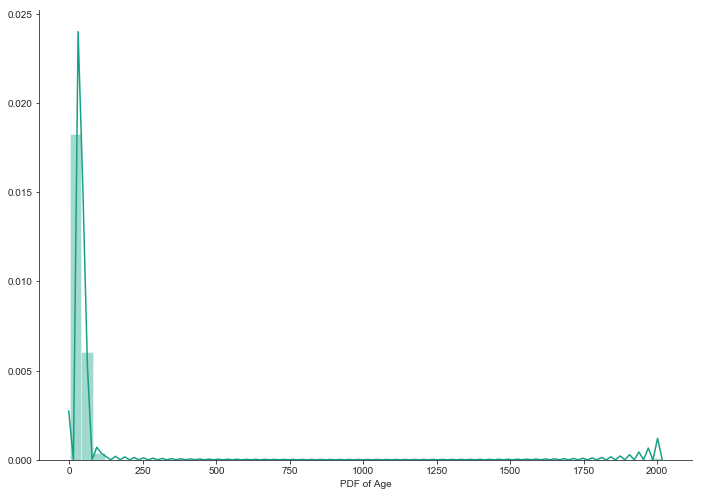

In [71]:
# Checking for outliers in age

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(users.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

From the graph we can see that the age of the user lies in the range from 0 to 2000 which is not possible and not acceptable.
So to make the age column realistic we are removing the outliers and cutting the age range between 15-90.

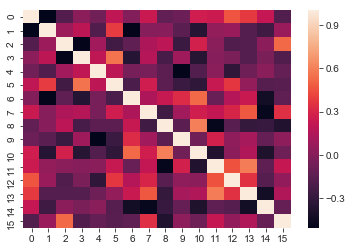

In [74]:
import seaborn as sns
corr = users.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [97]:
# Categorizing the age between 15-90

users.loc[users.age > 90, 'age'] = np.nan
users.loc[users.age < 15, 'age'] = np.nan

In [102]:
users['nans'] = np.sum([
    (users['age'] == -1),
    (users['gender'] == '-unknown-'),
    (users['language'] == '-unknown-'),
    (users['first_affiliate_tracked'] == 'untracked'),
    (users['first_browser'] == '-unknown-')
], axis=0)

In [103]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'], errors='ignore')
users['date_first_active'] = pd.to_datetime(users['timestamp_first_active'],format='%Y-%m-%d')

In [104]:
date_account_created = pd.DatetimeIndex(users['date_account_created'])
date_first_active = pd.DatetimeIndex(users['date_first_active'])

In [105]:
users['day_account_created'] = date_account_created.day
users['weekday_account_created'] = date_account_created.weekday
users['week_account_created'] = date_account_created.week
users['month_account_created'] = date_account_created.month
users['year_account_created'] = date_account_created.year
users['day_first_active'] = date_first_active.day
users['weekday_first_active'] = date_first_active.weekday
users['week_first_active'] = date_first_active.week
users['month_first_active'] = date_first_active.month
users['year_first_active'] = date_first_active.year

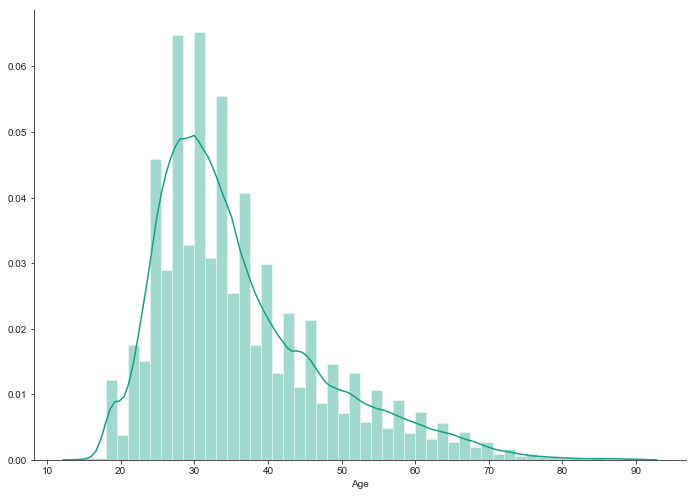

In [100]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
users['age']=users['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(users.age.dropna(), color='#16A085')
plt.xlabel('Age')
sns.despine()

From the graph we can see that we have removed the outliers and now the age lies between 15-90.

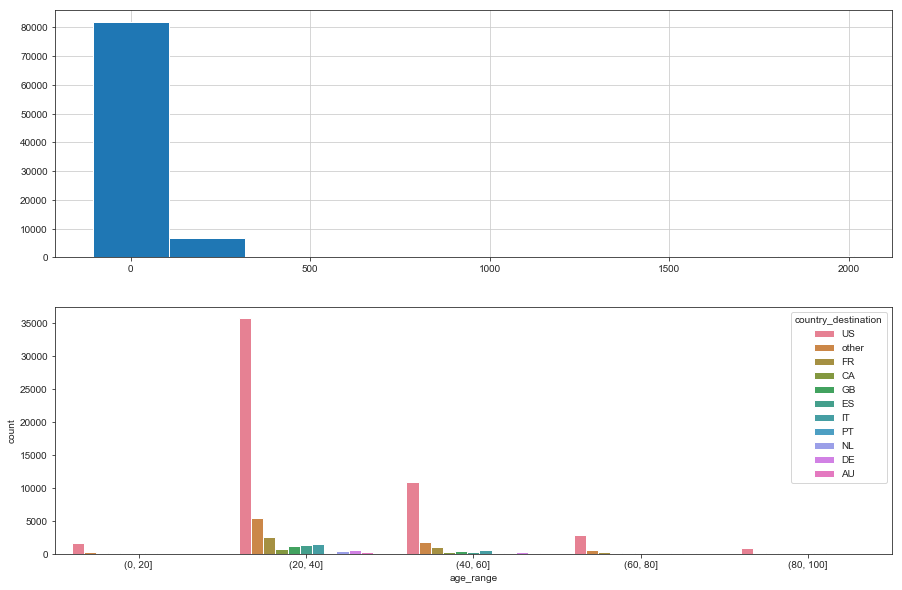

In [24]:
# Plot
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,10))

# frequency for age values(in case there was a booking)
train_users['age'][train_users['country_destination'] != 'NDF'].hist(ax=axis1)

# cut age values into ranges 
train_users['age_range'] = pd.cut(train_users["age"], [0, 20, 40, 60, 80, 100])

# frequency of country_destination for every age range
sns.countplot(x="age_range",hue="country_destination", data=train_users[train_users['country_destination'] != 'NDF'], palette="husl", ax=axis2)

# drop age_range
train_users.drop(['age_range'], axis=1, inplace=True)

# drop columns
train_users.drop(['age'], axis=1,inplace=True)
test_users.drop(['age'], axis=1,inplace=True)

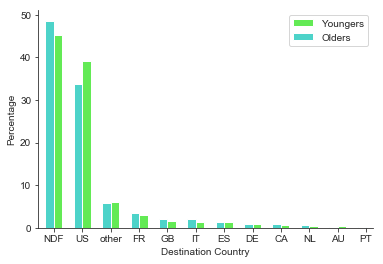

In [101]:
age = 60

width = 0.3
younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

We can see that the young people tends to stay in the US, and the older people choose to travel outside the country. 
The first thing we thought when reading the problem was the importance of the native lenguage when choosing the destination country. So let's see how manny users use english as main language:

In [102]:
print((sum(users.language == 'en') / users.shape[0])*100)

96.3675888323952


With the 96% of users using English as their language, it is understandable that a lot of people stay in the US. 

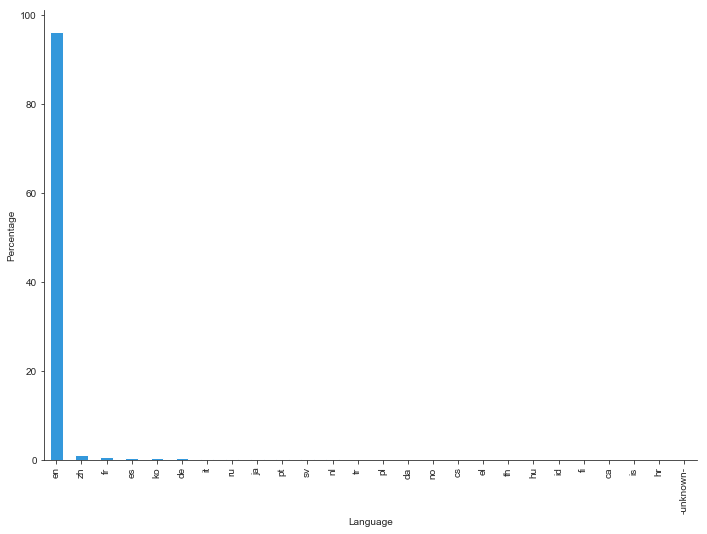

In [103]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = users.language.value_counts() / users.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Language')
plt.ylabel('Percentage')
sns.despine()

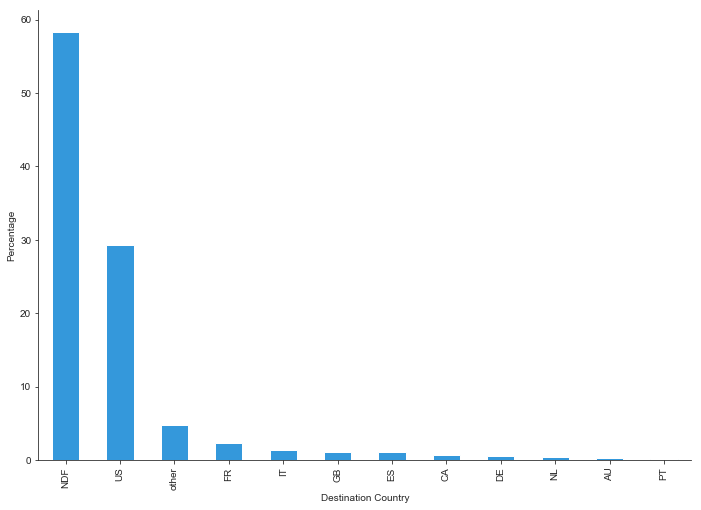

In [104]:
#Plotting the destination country

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = train_users.country_destination.value_counts() / train_users.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

Observations :
Almost, 57% of users in Train data set did not travel anywhere.
Also, 28 % of users travelled in U.S.A

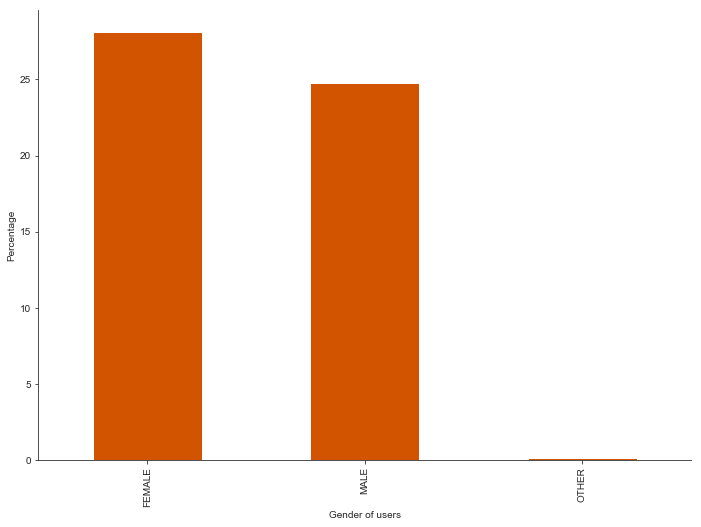

In [105]:
# Plotting Gender Data

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
gender_percentage = users.gender.value_counts() / users.shape[0] * 100
gender_percentage.plot(kind='bar',color='#D35400')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

From the above graph we can see there is no major difference between the booking percentage of the two genders.

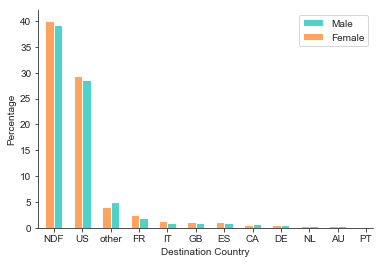

In [106]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.3

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

There are no big differences between the 2 main genders, so this plot it's not really ussefull except to know the relative destination frecuency of the countries.

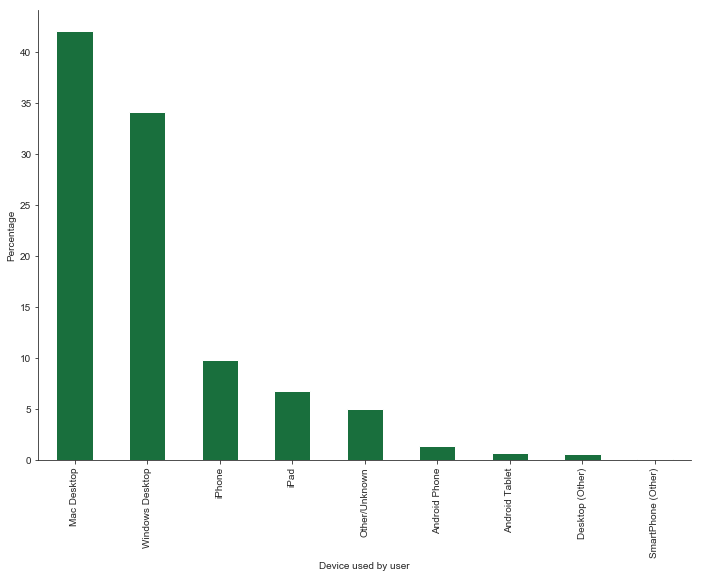

In [107]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = train_users.first_device_type.value_counts() / train_users.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

It seems that the most popular device that users use to first access Airbnb’s website is Mac desktop (40%) followed by Windows desktop (35%).

Almost all the users language preference is English. This is reasonable as our population for the problem comes from US.

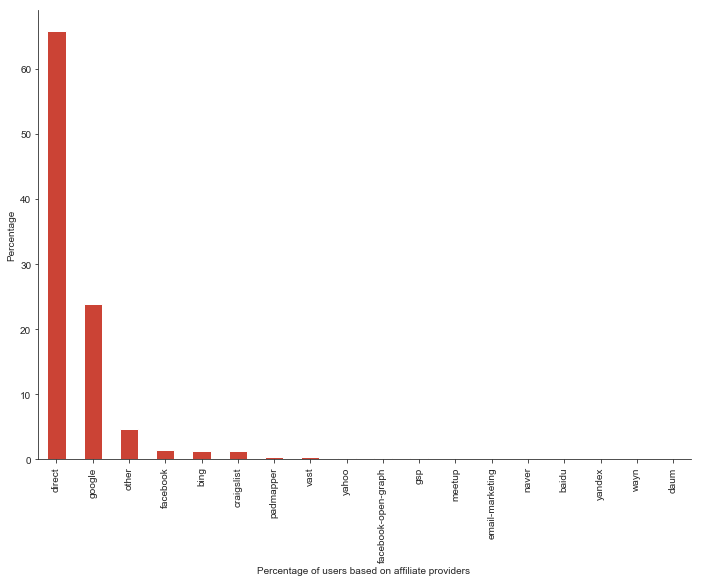

In [108]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = users.affiliate_provider.value_counts() / users.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color='#CB4335')
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
sns.despine()

We see that nearly 70% of the users came to the Airbnb’s website directly without any affiliate involvement

In [109]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

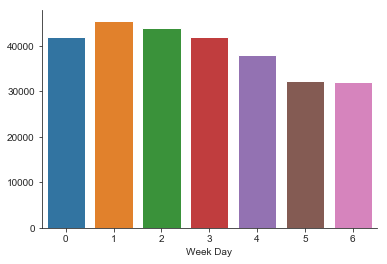

In [110]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

We can also see that Monday has the maximum number of booking.

In [107]:
sessions.rename(columns = {'user_id': 'id'}, inplace=True)

In [108]:
action_count = sessions.groupby(['id', 'action'])['secs_elapsed'].agg(len).unstack()
action_type_count = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_detail_count = sessions.groupby(['id', 'action_detail'])['secs_elapsed'].agg(len).unstack()
device_type_sum = sessions.groupby(['id', 'device_type'])['secs_elapsed'].agg(sum).unstack()

sessions_data = pd.concat([action_count, action_type_count, action_detail_count, device_type_sum],axis=1)
sessions_data.columns = sessions_data.columns.map(lambda x: str(x) + '_count')

# Most used device
sessions_data['most_used_device'] = sessions.groupby('id')['device_type'].max()

users = users.join(sessions_data, on='id')

C:\Users\shahs\aa\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [109]:
secs_elapsed = sessions.groupby('id')['secs_elapsed']

secs_elapsed = secs_elapsed.agg(
    {
        'secs_elapsed_sum': np.sum,
        'secs_elapsed_mean': np.mean,
        'secs_elapsed_min': np.min,
        'secs_elapsed_max': np.max,
        'secs_elapsed_median': np.median,
        'secs_elapsed_std': np.std,
        'secs_elapsed_var': np.var,
        'day_pauses': lambda x: (x > 86400).sum(),
        'long_pauses': lambda x: (x > 300000).sum(),
        'short_pauses': lambda x: (x < 3600).sum(),
        'session_length' : np.count_nonzero
    }
)

users = users.join(secs_elapsed, on='id')

C:\Users\shahs\aa\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


In [110]:
categorical_features = [
    'gender', 'signup_method', 'signup_flow', 'language',
    'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
    'signup_app', 'first_device_type', 'first_browser', 'most_used_device'
]
users = pd.get_dummies(users, columns=categorical_features)

In [111]:
users.set_index('id', inplace=True)
users.loc[train_users['id']].to_csv('C:/Users/shahs/Desktop/Rutgers/Sem 2/STATS & ML/Project/train_users_2.csv')


The local minimums where the Sundays(where the people use less the Internet), and it's usually to hit a maximum at Monday!

## Models Used
1) Random Forest

2) Naive Bayes (Bernoulli, Multinomial Naive Bayes, Gaussian Naive Bayes)

3) K Nearest Neighbor

4) Decision Tree

5) Logistic Regression

In [315]:
import sys
!{sys.executable} -m pip install xgboost

In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

In [113]:
train_users['Age_Over40'] = (train_users.age >39).map({True:1,False:0})
train_users['Age_31-39'] = ((train_users.age<40) & (train_users.age>30)).map({True:1,False:0})
train_users['Age_Under31'] = (train_users.age <31).map({True:1,False:0})
train_users['Age_unknown'] = (train_users.age.isnull()).map({True:1,False:0})

In [114]:
#reorder columns to have all features to encode side by side
cols = train_users.columns.tolist()
cols.insert(0,cols.pop(5))
cols.insert(0,cols.pop(15))
train_users = train_users[cols]

#one hot encoding to prepare for modelling
encoding = pd.get_dummies(train_users.iloc[:,6:16],columns =train_users.iloc[:,6:16].columns, prefix=list(train_users.columns[6:16]))
onehot = pd.concat([train_users.iloc[:,:6],encoding,train_users.iloc[:,16:20]],axis=1)

In [142]:
### Data Preparation for Classification ### 
# Prepare Train/Test data for classification
df_train = users.head(train_users.shape[0])
df_test = users.tail(test_users.shape[0])
X = df_train.drop(["country_destination"],axis=1)
y = df_train["country_destination"]

# modify country_destination to numerical values
country_num_dic = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4, 'GB': 5, 'ES': 6, 
                   'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}
num_country_dic = {y:x for x,y in country_num_dic.items()}
y = y.map(country_num_dic)

# 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define score function for classifiers
def score(true,pred):
  return (precision_score(true,pred, average='weighted'), accuracy_score(true,pred))

# Define print_score function to report classifiers' performance
def print_score(s):
  print("""
Precision:    {:0.3}
Accuracy:     {:0.3}
""".format(*s))

labels = [0,1,2,3,4,5,6,7,8,9,10,11]
targets=['NDF', 'US', 'other', 'FR', 'IT', 'GB', 'ES', 'CA', 'DE', 'NL', 'AU', 'PT']


In [143]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

#train test split dataset to measure performance. Original test_users dataset provided by airbnb does not come with labels
# so we need to create our own test set
x_train,x_test,y_train,y_test = train_test_split(onehot,onehot['country_destination'],test_size=0.25,random_state=1)

## Random forest classification


In [145]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [146]:
#fit RF classifier 

clf.fit(x_train.iloc[:,6:156],y_train)

C:\Users\shahs\aa\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [147]:
#predict and store predictions in a series 

preds = clf.predict(x_test.iloc[:,6:156])

In [148]:
#add the series to our dataframe

x_test['predicted_country'] = preds

C:\Users\shahs\aa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
#import packages used for model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score
def score(true,pred):
    return(precision_score(true,pred,average='weighted'),
          recall_score(true,pred,average='weighted'),
          f1_score(true,pred,average='weighted'))

In [150]:
#get overall accuracy score for the RF model

accuracy_score(x_test['country_destination'],x_test['predicted_country'])

0.601427955699642

In [328]:
#FEATURE SELECTION - check most important features to the random forest algorithm

featureImportance = pd.DataFrame(clf.feature_importances_,onehot.columns[6:156],columns=['feature_importance']).sort_values(["feature_importance"],ascending=False)
featureImportance.head(10)

,feature_importance
Age_31-39,0.094607
Age_Under31,0.088331
Age_Over40,0.076009
gender_-unknown-,0.062144
signup_method_facebook,0.039427
signup_method_basic,0.038780
gender_MALE,0.035651
gender_FEMALE,0.032819
first_affiliate_tracked_untracked,0.028667
first_affiliate_tracked_linked,0.022591


In [329]:
#split the data again using only the top 27 features

x_train,x_test,y_train,y_test = train_test_split(onehot.loc[:,list(featureImportance[:27].index)],onehot['country_destination'],test_size=0.25,random_state=1)

In [330]:
#Generate Predictions for RF classifier with 27 features

clf = RandomForestClassifier()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

C:\Users\shahs\aa\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [331]:
#New accuracy score!

RF = accuracy_score(y_test,preds)
RF

0.6259018421003317

## Naive Bayes


In [332]:
#import NB package

from sklearn.naive_bayes import BernoulliNB

In [333]:
#Generate predictions using Naive Bayes

clf = BernoulliNB()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [334]:
#NB accuracy score - 57.6%, lower than baseline

BNB = accuracy_score(y_test,preds)
BNB

0.5760733092217454

## Gaussian Naive Bayes Classifier


In [335]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

In [336]:
GNB = accuracy_score(y_test,preds)
GNB

0.5515244645166126

## Multinomial Naive Bayes

In [337]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

MNB = accuracy_score(y_test, preds)
MNB

0.5954312913441898

In [338]:
from sklearn.metrics import precision_score,classification_report, confusion_matrix

print("\n\nNaive Bayes Performance")
#s = classification_report(y_test, nb.predict(X_test), labels, targets)
#print(s)
s = score(y_test, clf.predict(x_test))
print_score(s)
print(confusion_matrix(y_test, clf.predict(x_test)))




Naive Bayes Performance


C:\Users\shahs\aa\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Precision:    0.503
Accuracy:     0.595

[[    0     0     0     0     0     0     0    87     0     0    42     0]
 [    0     0     0     0     0     0     0   235     0     0   127     0]
 [    0     0     0     0     0     0     0   178     0     0    88     0]
 [    0     0     0     0     0     0     0   377     0     0   193     0]
 [    0     0     0     0     0     0     0   851     0     0   359     0]
 [    0     0     0     0     0     0     0   404     0     0   194     0]
 [    0     0     0     0     0     0     0   514     0     0   232     0]
 [    0     0     0     0     0     0     0 26557     0     0  4759     0]
 [    0     0     0     0     0     0     0   117     0     0    61     0]
 [    0     0     0     0     0     0     0    43     0     0    12     0]
 [    0     0     0     0     0     0     0 10257     0     0  5217     0]
 [    0     0     0     0     0     0     0  1688     0     0   771     0]]


C:\Users\shahs\aa\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## KNN Classifier

In [347]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,classification_report, confusion_matrix


knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)

knn1.fit(x_train, y_train)
knn5.fit(x_train, y_train)
knn10.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [348]:
def score(true,pred):
  return (precision_score(true,pred, average='weighted'), accuracy_score(true,pred))

# Define print_score function to report classifiers' performance
def print_score(s):
  print("""
Precision:    {:0.3}
Accuracy:     {:0.3}
""".format(*s))

labels = [0,1,2,3,4,5,6,7,8,9,10,11]
targets=['NDF', 'US', 'other', 'FR', 'IT', 'GB', 'ES', 'CA', 'DE', 'NL', 'AU', 'PT']

In [342]:
print("\n\nKNN 1 Neighbor Performance")
s = classification_report(y_test, clf.predict(x_test), labels, targets)
print(s)
s = score(y_test,knn1.predict(x_test))
print_score(s)



KNN 1 Neighbor Performance


C:\Users\shahs\aa\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\shahs\aa\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shahs\aa\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\shahs\aa\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shahs\aa\lib\site-packages\sklearn\metrics\classification.py:1145: Undefi

              precision    recall  f1-score   support

         NDF       0.00      0.00      0.00         0
          US       0.00      0.00      0.00         0
       other       0.00      0.00      0.00         0
          FR       0.00      0.00      0.00         0
          IT       0.00      0.00      0.00         0
          GB       0.00      0.00      0.00         0
          ES       0.00      0.00      0.00         0
          CA       0.00      0.00      0.00         0
          DE       0.00      0.00      0.00         0
          NL       0.00      0.00      0.00         0
          AU       0.00      0.00      0.00         0
          PT       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0


Precision:    0.504
Accuracy:     0.494



In [343]:
print("\n\nKNN 5 Neighbor Performance")

s = score(y_test,knn5.predict(x_test))
print_score(s)
print(confusion_matrix(y_test, knn5.predict(x_test)))




KNN 5 Neighbor Performance


C:\Users\shahs\aa\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Precision:    0.516
Accuracy:     0.593

[[    0     3     0     1     0     0     0    75     0     0    50     0]
 [    0     1     0     2     5     0     1   205     0     0   148     0]
 [    0     0     0     1     4     0     0   168     0     0    92     1]
 [    0     5     0     2     0     2     0   367     0     0   193     1]
 [    1     6     0     3    13     2     4   734     0     0   445     2]
 [    0     2     0     0     6     4     1   385     0     0   200     0]
 [    1     8     1     5     3     2     3   457     0     0   263     3]
 [    8    54     5    39   139    24    24 26052     0     0  4930    41]
 [    0     3     0     0     1     0     1   114     0     0    58     1]
 [    0     1     0     1     0     1     1    33     0     0    17     1]
 [    3    72     5    55   128    32    24  9577     0     0  5538    40]
 [    0    13     2     8    28     6     3  1565     1     0   827     6]]


In [349]:
print("\n\nKNN 10 Neighbor Performance")

s = score(y_test,knn10.predict(x_test))
print_score(s)
print(confusion_matrix(y_test, knn10.predict(x_test)))




KNN 10 Neighbor Performance


C:\Users\shahs\aa\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Precision:    0.529
Accuracy:     0.61

[[    0     0     0     0     0     0     0    73     0     0    56     0]
 [    0     0     0     0     0     0     0   193     0     0   168     1]
 [    0     0     0     0     1     0     0   162     0     0   103     0]
 [    0     0     0     0     0     0     1   362     0     0   207     0]
 [    0     0     0     0     5     0     1   689     0     0   514     1]
 [    0     0     0     0     1     0     1   357     0     0   239     0]
 [    0     0     0     0     0     0     0   466     0     0   280     0]
 [    0     0     0     0    27     0     9 26197     0     0  5079     4]
 [    0     0     0     0     1     0     0   107     0     0    70     0]
 [    0     0     0     0     0     0     0    36     0     0    19     0]
 [    0     1     0     0    26     0    18  9060     0     0  6362     7]
 [    0     0     1     0     6     0     3  1500     0     0   948     1]]


In [350]:
#Neural Network
#import NN package

from sklearn.neural_network import MLPClassifier

In [351]:
#Generate prediction using Neural Net

clf = MLPClassifier()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [352]:
#Neural Network accuracy score - 63.6%

NN = accuracy_score(y_test,preds)
NN

0.6369769315818076

## Decision Tree

In [353]:
from time import time
from math import sqrt
import logging
import os
import sys
import csv
import datetime


total = {}
started = {}
model_perf={}

        
def start(key):
    started[key]=time()


def stop(key):
    stop=time()
    start=started.pop(key,None)
    if start:
        if key in total:
            total[key].append(stop-float(start))
        else:
            total[key]=[stop-float(start)]
    else:
        logging.error("stopping non started timer: %s"%key)

In [354]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
start('dt')
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
start('dt')

In [355]:
feature_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), X.columns.tolist()), 
             reverse=True))
feature_imp.columns = ['value','feature']
feature_imp.set_index('feature',inplace=True)
feature_imp.head(10)

,value
feature,
timestamp_first_active,0.1510
date_first_booking,0.1065
date_first_active,0.1016
age,0.0981
date_account_created,0.0977
12_count,0.0350
week_account_created,0.0324
weekday_first_active,0.0312
acculynk_bin_check_success_count,0.0248


In [356]:
start('dt')
y_pred_dt=dt.predict(x_test)
stop('dt')

In [357]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(y_test, y_pred_dt)))
model_perf['dt','Accuracy'] = accuracy_score(y_test, y_pred_dt)

Accuracy:0.6251897382081217


## Logistic regression model

In [358]:
#We first built a Logistic regression model optimised for OVR (One Vs Rest). Since more than 3/4 of the country destination is accounted for by 'NDF' and 'US' we evaluated the performance of the Logistic Regression model optimised to minimize the loss for OVR.
from sklearn.linear_model import LogisticRegression
start('logr')
logr = LogisticRegression()
logr.fit(x_train, y_train)
stop('logr')

C:\Users\shahs\aa\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahs\aa\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [359]:
start('logr')
y_pred_logr=logr.predict(x_test)
stop('logr')
pd.crosstab(y_test, y_pred_logr, rownames=['Actual Destination'], colnames=['Predicted Destination'])


Predicted Destination,NDF,US
Actual Destination,,
AU,67,62
CA,183,179
DE,147,119
ES,328,242
FR,688,522
GB,314,284
IT,417,329
NDF,26618,4698
NL,90,88


In [360]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(y_test, y_pred_logr)))
model_perf['logr','Accuracy'] = accuracy_score(y_test, y_pred_logr)

Accuracy:0.6315237149335682


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logr))

In [361]:
#Next we built built a Logistic regression Multinomial classification model. Since the primary objective of the problem at hand was to predict the possible destination a user will book we hypothesized that this model may have a lower accuracy score but it will do better on the nDCG score.
from sklearn.linear_model import LogisticRegression
start('logr_mlt')
logr_mlt = LogisticRegression(n_jobs=1,multi_class='multinomial',solver='newton-cg')
logr_mlt.fit(x_train, y_train)
stop('logr_mlt')

In [362]:
start('logr_mlt')
y_pred_logr_mlt=logr_mlt.predict(x_test)
stop('logr_mlt')
pd.crosstab(y_test, y_pred_logr_mlt, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,NDF,US
Actual Destination,,
AU,66,63
CA,180,182
DE,142,124
ES,326,244
FR,679,531
GB,309,289
IT,415,331
NDF,26522,4794
NL,89,89


In [363]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(y_test, y_pred_logr_mlt)))
model_perf['logr_mlt','Accuracy'] = accuracy_score(y_test, y_pred_logr_mlt)

Accuracy:0.6321796000974458
